# Final Project Notebook

The report for this final project can be found at this [link](https://cybertraining-dsc.github.io/report/fa20-523-301/project/project/).

In [ ]:
### Migrated to Github. No longer need to use this.

# from google.colab import drive
# drive.mount('/content/drive')

## Part 1 Importing the functions

This file requires that we import Numpy, Matplotlib, Pylab, Keras, and Pandas

In [11]:
import numpy as np
from numpy import mean
from numpy import std

from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
import pylab
import os, sys
import pandas as pd
import io
import requests
import warnings
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime
from math import sqrt

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot

from sklearn.datasets import make_regression

! pip install cloudmesh-common -U

from cloudmesh.common.Benchmark import Benchmark

! pip install utils
! pip install lightgbm
import utils
import lightgbm

from IPython.display import Image
from IPython.core.display import HTML 

import time

### NEW ###
import seaborn as sns
from scipy.stats import zscore
### NEW ###

Requirement already up-to-date: cloudmesh-common in /usr/local/lib/python3.6/dist-packages (4.3.26)


## Part 1.1 Setting up the accuracy metrics

In [2]:
# Setting up testing metrics. Decided not to use, but these could be if the built in functions did not work correctly
# First is Mean Absolute Error

def mae_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		sum_error += abs(predicted[i] - actual[i])
	return sum_error / float(len(actual))
 
# Calculate Root Mean Squared Error

def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)

# Calculate accuracy percentage between two lists

def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0 

# Confusion Matrix Metric development

def confusion_matrix(actual, predicted):
	unique = set(actual)
	matrix = [list() for x in range(len(unique))]
	for i in range(len(unique)):
		matrix[i] = [0 for x in range(len(unique))]
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for i in range(len(actual)):
		x = lookup[actual[i]]
		y = lookup[predicted[i]]
		matrix[y][x] += 1
	return unique, matrix



In [3]:
# This code will print a table for the results when we get to our models

def print_results(key, values, png):
  print('Category \tValue')
  print('----------------------------------')
  for i in range(len(key)):
    print(key[i], ' \t', values[i])
  print('----------------------------------\n\n\n\nSCREENSHOT THESE RESPONSES TO MAKE', png)
  return


## Conditioned Code. Only Use this for work to save on processing.

We have put all of our data files on Github at [Github Link](https://github.com/cybertraining-dsc/fa20-523-301/tree/master/project/code).

Previously we had moved all of the files to the following [Drive Location](https://drive.google.com/drive/folders/1flPbO7Q0ID70Or_OZ4MdW6CbYDE32GeT). 

##Images fo data engineering and exploratory analysis
####Below are images taken of the code from our project_dataEngineering.ipynb of the work done prepare the data for training.  This includes transforming data across multiple tables and using keys to develop avg game metrics specific to injury and recovery dates.


In [ ]:
# If Images were ran from Google, this code would be used. We loaded these images into Github

# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture1.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture2.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture3.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture4.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture5.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture6.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture7.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture8.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture9.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture10.PNG'))
# display(Image.open('/content/drive/My Drive/Colab Notebooks/data_engineering_images/Capture11.PNG'))


![Capture 1](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture1.png)
![Capture 2](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture2.png)
![Capture 3](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture3.png)
![Capture 4](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture4.png)
![Capture 5](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture5.png)
![Capture 6](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture6.png)
![Capture 7](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture7.png)
![Capture 8](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture8.png)
![Capture 9](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture9.png)
![Capture 10](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture10.png)
![Capture 11](https://github.com/cybertraining-dsc/fa20-523-301/raw/master/project/images/capture11.png)



In [ ]:
# ########################################################################
# # Load In Conditioned Datasets - Upload to the Colab files on the left #
# ########################################################################

# # df_Injury_length
# #df_Injury_length = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_Injury_length.csv') 
# df_Injury_length = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/df_Injury_length.csv') 
# # df_Injury_stats
# #df_Injury_stats = pd.read_csv('/content/drive/My Drive/Colab Notebooks/df_Injury_stats.csv') 
# df_Injury_stats = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/df_Injury_stats.csv') 

# ds_NBA_Injuries = [df_Injury_length, df_Injury_stats]
# #nba games dataset
# df_Games_games = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/games.csv')
# df_Games_gamesDetails = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/df_Games_gamesDetails.csv')
# df_Games_players = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/players.csv')
# df_Games_ranking = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/ranking.csv')
# df_Games_teams = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/teams.csv')
# ds_NBA_Games = [df_Games_games, df_Games_gamesDetails, df_Games_players, df_Games_ranking, df_Games_teams]

In [16]:
Benchmark.Start()

df_Injury_length = pd.read_csv('https://github.com/cybertraining-dsc/fa20-523-301/raw/main/project/data/df_Injury_length.csv') 
df_Injury_stats = pd.read_csv('https://github.com/cybertraining-dsc/fa20-523-301/raw/main/project/data/df_Injury_stats.csv') 
df_Injury_stats = pd.read_csv('https://github.com/cybertraining-dsc/fa20-523-301/raw/main/project/data/df_Injury_stats.csv') 
df_Season_stats = pd.read_csv('https://github.com/cybertraining-dsc/fa20-523-301/raw/main/project/data/df_Season_stats.csv') 

ds_NBA_Injuries = [df_Injury_length, df_Injury_stats]

time.sleep(3)
Benchmark.Stop()

# df = pd.read_csv(url, index_col=0)
# print(df.head(5))

In [17]:
Benchmark.print()


+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                           

KeyError: ignored

Data Exploration

In [ ]:
df_Injury_length.head()

,Unnamed: 0,Unnamed: 0.1,PLAYER_ID,DateRecovered,DateInjured,TEAM_ID,Team,Player,InjuryNotes,RecoverNotes,NumberInjuries,InjuryLengthDays,SeasonInjured,SeasonRecovered
0,0,0,255,2011-01-14,2011-01-11,1610612756,Suns,Grant Hill,placed on IL with sore/sprained right knee,activated from IL,20.0,3,2010.0,2010.0
1,1,1,255,2013-01-12,2012-01-13,1610612756,Suns,Grant Hill,strained right quadriceps (DNP),activated from IL,20.0,365,2011.0,2012.0
2,2,2,255,2013-04-27,2013-04-25,1610612746,Clippers,Grant Hill,placed on IL,activated from IL,20.0,2,2012.0,2012.0
3,3,3,406,2010-11-11,2010-11-02,1610612738,Celtics,Shaquille O'Neal,placed on IL with bruised right knee,activated from IL,17.0,9,2010.0,2010.0
4,4,4,406,2011-04-03,2010-12-09,1610612738,Celtics,Shaquille O'Neal,sore right calf (P) / sore left knee (CBC) (DNP),activated from IL,17.0,115,2010.0,2010.0


In [ ]:
df_Injury_stats.head()


,Unnamed: 0,PLAYER_ID,DateRecovered,DateInjured,TEAM_ID,Team,Player,InjuryNotes,RecoverNotes,NumberInjuries,InjuryLengthDays,SeasonInjured,SeasonRecovered,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,pr5_MIN,pr5_FGA,pr5_FG_PCT,pr5_FG3A,pr5_FG3_PCT,pr5_FTA,pr5_FT_PCT,pr5_REB,pr5_AST,pr5_STL,pr5_BLK,pr5_TO,...,rev_FTA,rev_FT_PCT,rev_REB,rev_AST,rev_STL,rev_BLK,rev_TO,rev_PF,rev_PTS,rev_PLUS_MINUS,po5_MIN,po5_FGA,po5_FG_PCT,po5_FG3A,po5_FG3_PCT,po5_FTA,po5_FT_PCT,po5_REB,po5_AST,po5_STL,po5_BLK,po5_TO,po5_PF,po5_PTS,po5_PLUS_MINUS,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,255,2011-01-14,2011-01-11,1610612756,Suns,Grant Hill,placed on IL with sore/sprained right knee,activated from IL,20.0,3,2010.0,2010.0,4.116667,2.0,0.500,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,2.0,-5.0,30.503333,10.6,0.4674,1.0,0.2000,3.4,0.8668,4.0,3.0,1.2,0.4,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,38.0,203.2,102.0582,1994,80.0,13.2,4.2,2.5,1.5,0.037,0.122,0.201,0.563,0.126,2010-11
1,1,255,2013-01-12,2012-01-13,1610612756,Suns,Grant Hill,strained right quadriceps (DNP),activated from IL,20.0,365,2011.0,2012.0,7.300000,2.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,-14.0,28.523333,10.6,0.3390,1.4,0.0666,1.8,0.5500,4.0,1.8,1.0,0.8,1.4,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,39.0,203.2,102.0582,1994,49.0,10.2,3.5,2.2,3.3,0.025,0.110,0.186,0.500,0.116,2011-12
2,2,255,2013-04-27,2013-04-25,1610612746,Clippers,Grant Hill,placed on IL,activated from IL,20.0,2,2012.0,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.958333,3.0,0.5000,1.0,0.5000,0.0,0.0000,1.5,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,40.0,203.2,102.0582,1994,29.0,3.2,1.7,0.9,0.6,0.016,0.105,0.142,0.428,0.090,2012-13
3,3,406,2010-11-11,2010-11-02,1610612738,Celtics,Shaquille O'Neal,placed on IL with bruised right knee,activated from IL,17.0,9,2010.0,2010.0,22.533333,7.0,0.714,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,3.0,10.0,2.0,18.836667,5.2,0.6292,0.0,0.0000,4.0,0.7350,5.2,1.6,0.2,0.8,1.8,...,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.0,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,1992,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051,2010-11
4,4,406,2011-04-03,2010-12-09,1610612738,Celtics,Shaquille O'Neal,sore right calf (P) / sore left knee (CBC) (DNP),activated from IL,17.0,115,2010.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.380000,4.8,0.6394,0.0,0.0000,4.6,0.6000,5.2,1.0,0.2,1.0,1.6,...,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.0,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,1992,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051,2010-11


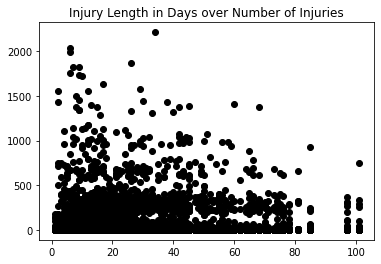

In [ ]:
plt.plot(df_Injury_length['NumberInjuries'], df_Injury_length['InjuryLengthDays'], 'o', color='black')
#plt.yticks(np.arange(0, max(df_Injury_length['InjuryLengthDays']), 100.0))
plt.title("Injury Length in Days over Number of Injuries")
plt.savefig('injury_length.png')

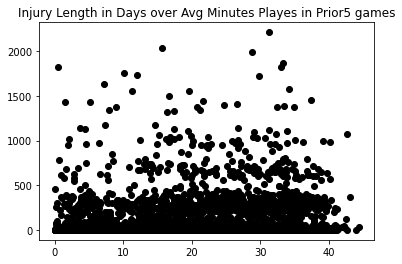

In [ ]:
plt.plot(df_Injury_stats['pr5_MIN'], df_Injury_stats['InjuryLengthDays'], 'o', color='black')
#plt.yticks(np.arange(0, 800, 100.0))
plt.title("Injury Length in Days over Avg Minutes Playes in Prior5 games")
plt.savefig('injury_length_over_avg_min.png')

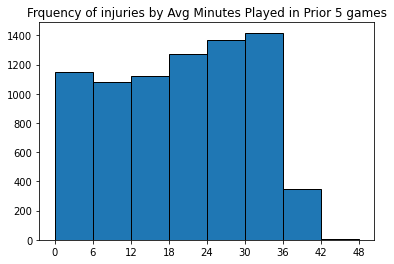

In [ ]:
plt.hist(df_Injury_stats['pr5_MIN'], bins=[0, 6, 12, 18, 24, 30, 36, 42, 48], edgecolor='black')
plt.xticks([0, 6, 12, 18, 24, 30, 36, 42, 48])
plt.title("Frquency of injuries by Avg Minutes Played in Prior 5 games")
plt.savefig('frequencies_by_average_minutes.png')

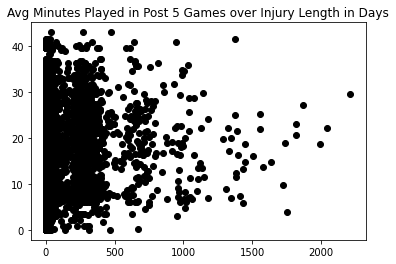

In [ ]:
plt.plot(df_Injury_stats['InjuryLengthDays'], df_Injury_stats['po5_MIN'], 'o', color='black')
plt.title("Avg Minutes Played in Post 5 Games over Injury Length in Days")
#####made mistake in engineering file need to fix beofre continue
plt.savefig('avg_minutes_played_in_post_5_per_injury_length.png')

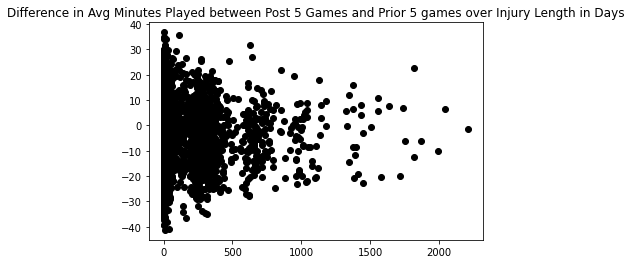

In [ ]:
plt.plot(df_Injury_stats['InjuryLengthDays'], (df_Injury_stats['po5_MIN']-df_Injury_stats['pr5_MIN']), 'o', color='black')
plt.title("Difference in Avg Minutes Played between Post 5 Games and Prior 5 games over Injury Length in Days")
plt.savefig('diff_avg_min_post5_and_prior5.png')

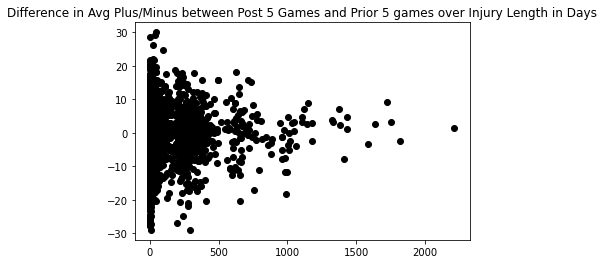

In [ ]:
plt.plot(df_Injury_stats['InjuryLengthDays'], (df_Injury_stats['po5_PLUS_MINUS']-df_Injury_stats['pr5_PLUS_MINUS']), 'o', color='black')
plt.title("Difference in Avg Plus/Minus between Post 5 Games and Prior 5 games over Injury Length in Days")
plt.savefig('diff_plus_minus_post5_and_prior5.png')

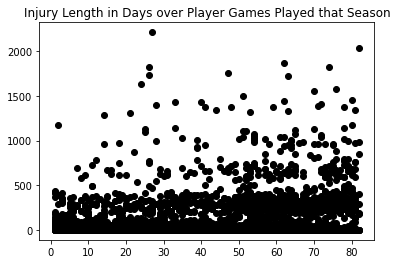

In [ ]:
plt.plot(df_Injury_stats['gp'], (df_Injury_stats['InjuryLengthDays']), 'o', color='black')
plt.title("Injury Length in Days over Player Games Played that Season")
plt.savefig('injurylength_gamesplayed.png')

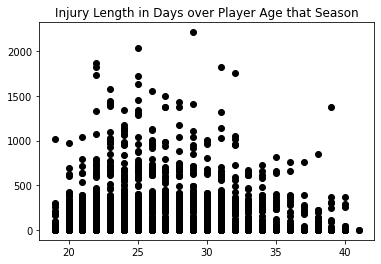

In [ ]:
plt.plot(df_Injury_stats['age'], (df_Injury_stats['InjuryLengthDays']), 'o', color='black')
plt.title("Injury Length in Days over Player Age that Season")
plt.savefig('injurylength_playerage.png')

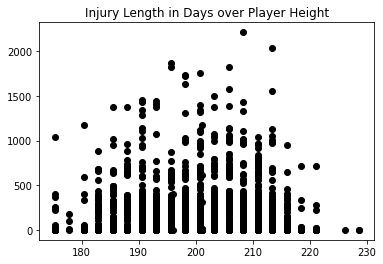

In [ ]:
plt.plot(df_Injury_stats['player_height'], (df_Injury_stats['InjuryLengthDays']), 'o', color='black')
plt.title("Injury Length in Days over Player Height")
plt.savefig('injurylength_playerHeight.png')

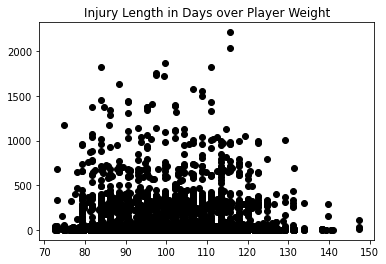

In [ ]:
plt.plot(df_Injury_stats['player_weight'], (df_Injury_stats['InjuryLengthDays']), 'o', color='black')
plt.title("Injury Length in Days over Player Weight")
plt.savefig('injurylength_playerWeight.png')

In [ ]:
#Pair Plot
sns.pairplot(df_Injury_stats)
plt.show()

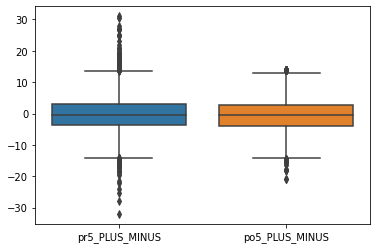

In [ ]:
 df_boxplot = pd.DataFrame()

df_boxplot['pr5_PLUS_MINUS'] = df_Injury_stats['pr5_PLUS_MINUS']

df_boxplot['po5_PLUS_MINUS'] = df_Injury_stats['po5_PLUS_MINUS']

sns.boxplot(data=df_boxplot)
#sns.plt.show()

## We are now ready to structure our dataframes

The team must now use these downloads to create dataframes. Pandas dataframes will be easier to manage the data. The team will be able to use Pandas to process the data and allow the team to make correlations for feature engineering to create the models.

# Part 2 Building the Models

A link for Keras for us to use can be found [here](https://keras.io/guides/sequential_model/). We are first going to set up our Benchmark Test to be used when we are Benchmarking our model.

In [ ]:
def b():
  Benchmark.Start()
  print ("b")
  import time
  time.sleep(3)
  Benchmark.Stop()

def c():
  Benchmark.Start()
  print ("c")
  import time
  time.sleep(1)
  Benchmark.Stop()

In [ ]:
 b()
 c()

 Benchmark.print()

b
c

+---------------------+------------------------------------------------------------------+
| Attribute           | Value                                                            |
|---------------------+------------------------------------------------------------------|
| BUG_REPORT_URL      | "https://bugs.launchpad.net/ubuntu/"                             |
| DISTRIB_CODENAME    | bionic                                                           |
| DISTRIB_DESCRIPTION | "Ubuntu 18.04.5 LTS"                                             |
| DISTRIB_ID          | Ubuntu                                                           |
| DISTRIB_RELEASE     | 18.04                                                            |
| HOME_URL            | "https://www.ubuntu.com/"                                        |
| ID                  | ubuntu                                                           |
| ID_LIKE             | debian                                                       

Now that we know which GPU we are using, we can get into the actual work. The following is building our various models.

In [ ]:
np.random.seed(23)
warnings.filterwarnings("ignore")

In [ ]:
df_Injury_stats_fillna = df_Injury_stats.copy()

In [ ]:
df_Injury_stats_fillna.head()

,Unnamed: 0,PLAYER_ID,DateRecovered,DateInjured,TEAM_ID,Team,Player,InjuryNotes,RecoverNotes,NumberInjuries,InjuryLengthDays,SeasonInjured,SeasonRecovered,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,pr5_MIN,pr5_FGA,pr5_FG_PCT,pr5_FG3A,pr5_FG3_PCT,pr5_FTA,pr5_FT_PCT,pr5_REB,pr5_AST,pr5_STL,pr5_BLK,pr5_TO,...,rev_FTA,rev_FT_PCT,rev_REB,rev_AST,rev_STL,rev_BLK,rev_TO,rev_PF,rev_PTS,rev_PLUS_MINUS,po5_MIN,po5_FGA,po5_FG_PCT,po5_FG3A,po5_FG3_PCT,po5_FTA,po5_FT_PCT,po5_REB,po5_AST,po5_STL,po5_BLK,po5_TO,po5_PF,po5_PTS,po5_PLUS_MINUS,age,player_height,player_weight,draft_year,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,255,2011-01-14,2011-01-11,1610612756,Suns,Grant Hill,placed on IL with sore/sprained right knee,activated from IL,20.0,3,2010.0,2010.0,4.116667,2.0,0.500,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,2.0,-5.0,30.503333,10.6,0.4674,1.0,0.2000,3.4,0.8668,4.0,3.0,1.2,0.4,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,38.0,203.2,102.0582,1994,80.0,13.2,4.2,2.5,1.5,0.037,0.122,0.201,0.563,0.126,2010-11
1,1,255,2013-01-12,2012-01-13,1610612756,Suns,Grant Hill,strained right quadriceps (DNP),activated from IL,20.0,365,2011.0,2012.0,7.300000,2.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,-14.0,28.523333,10.6,0.3390,1.4,0.0666,1.8,0.5500,4.0,1.8,1.0,0.8,1.4,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,39.0,203.2,102.0582,1994,49.0,10.2,3.5,2.2,3.3,0.025,0.110,0.186,0.500,0.116,2011-12
2,2,255,2013-04-27,2013-04-25,1610612746,Clippers,Grant Hill,placed on IL,activated from IL,20.0,2,2012.0,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.958333,3.0,0.5000,1.0,0.5000,0.0,0.0000,1.5,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,NaN,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,40.0,203.2,102.0582,1994,29.0,3.2,1.7,0.9,0.6,0.016,0.105,0.142,0.428,0.090,2012-13
3,3,406,2010-11-11,2010-11-02,1610612738,Celtics,Shaquille O'Neal,placed on IL with bruised right knee,activated from IL,17.0,9,2010.0,2010.0,22.533333,7.0,0.714,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,3.0,10.0,2.0,18.836667,5.2,0.6292,0.0,0.0000,4.0,0.7350,5.2,1.6,0.2,0.8,1.8,...,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.0,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,1992,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051,2010-11
4,4,406,2011-04-03,2010-12-09,1610612738,Celtics,Shaquille O'Neal,sore right calf (P) / sore left knee (CBC) (DNP),activated from IL,17.0,115,2010.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.380000,4.8,0.6394,0.0,0.0000,4.6,0.6000,5.2,1.0,0.2,1.0,1.6,...,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.0,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,1992,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051,2010-11


In [ ]:
cols =  ['DateRecovered',	'DateInjured',	'TEAM_ID',	'Team',	'Player',	'InjuryNotes',	'RecoverNotes', 'season', 'draft_year']

df_Injury_stats_fillna = df_Injury_stats_fillna.drop(cols, 1)

In [ ]:
df_Injury_stats_fillna = df_Injury_stats_fillna.fillna(df_Injury_stats_fillna.mean())

In [ ]:
## This applies the z-score to standardize our data. If a printout of the values 
## is needed, the reverse z-score with the mean can be used to pull out values

df_Injury_stats_fillna = df_Injury_stats_fillna.apply(zscore)


In [ ]:
df_Injury_stats_fillna.head()

,Unnamed: 0,PLAYER_ID,NumberInjuries,InjuryLengthDays,SeasonInjured,SeasonRecovered,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,pr5_MIN,pr5_FGA,pr5_FG_PCT,pr5_FG3A,pr5_FG3_PCT,pr5_FTA,pr5_FT_PCT,pr5_REB,pr5_AST,pr5_STL,pr5_BLK,pr5_TO,pr5_PF,pr5_PTS,pr5_PLUS_MINUS,rev_MIN,rev_FGA,rev_FG_PCT,rev_FG3A,rev_FG3_PCT,rev_FTA,rev_FT_PCT,rev_REB,rev_AST,rev_STL,rev_BLK,rev_TO,rev_PF,rev_PTS,rev_PLUS_MINUS,po5_MIN,po5_FGA,po5_FG_PCT,po5_FG3A,po5_FG3_PCT,po5_FTA,po5_FT_PCT,po5_REB,po5_AST,po5_STL,po5_BLK,po5_TO,po5_PF,po5_PTS,po5_PLUS_MINUS,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,-1.731839,-0.035141,-0.342089,-0.348438,-1.791641,-1.896411,-1.634047e+00,-1.056836e+00,6.555384e-01,-1.091952e+00,-8.314578e-01,-0.928255,-1.156319e+00,-0.080831,-1.065731,-0.881676,-6.962655e-01,2.060986,-0.473658,-9.680137e-01,-6.271430e-01,1.005066,0.654274,0.401102,-0.504870,0.054942,0.662839,1.629893,0.108780,0.529593,0.915810,-0.061080,-0.215609,0.904069,0.518545,-1.419461,-1.282143,0.711048,0.770721,-0.229153,-0.567593,-0.904099,-1.020899,-0.863009,0.287398,-0.786236,-0.536975,-1.091957,-0.697344,0.595430,-9.112459e-17,0.950707,1.698493,0.338637,-0.819719,-0.901745,1.611218,1.072150,0.663639,0.617058,1.881651,-0.399553,1.589986,-0.524441,1.731002,1.109850,2.549236,0.218496,0.118279,1.452914,0.709637,0.188184,0.327714,0.301625,-0.359606,-0.407596,0.241068,0.436392,-0.074157
1,-1.731415,-0.035141,-0.342089,1.769337,-1.434232,-1.164133,-1.243549e+00,-1.056836e+00,-1.792959e+00,-1.091952e+00,-8.314578e-01,-0.928255,-1.156319e+00,-0.945073,-1.065731,-0.881676,2.989846e+00,-1.138712,-0.473658,-1.327236e+00,-1.968956e+00,0.818092,0.654274,-0.290407,-0.320216,-0.657383,-0.110751,0.542502,0.108780,-0.069424,0.583958,0.645229,0.187910,0.501715,0.089677,2.035104,-1.282143,0.711048,0.770721,-0.229153,-0.567593,-0.904099,-1.020899,-0.863009,0.287398,-0.786236,-0.536975,-1.091957,-0.697344,0.595430,-9.112459e-17,0.950707,1.698493,0.338637,-0.819719,-0.901745,1.611218,1.072150,0.663639,0.617058,1.881651,-0.399553,1.589986,-0.524441,1.731002,1.109850,2.774727,0.218496,0.118279,0.051853,0.238944,-0.086594,0.163423,0.465257,-0.660623,-0.596069,-0.033702,-0.270631,-0.185530
2,-1.730991,-0.035141,-0.342089,-0.354289,-1.076823,-1.164133,4.358102e-16,-2.168458e-16,2.990216e-15,-1.315076e-16,-8.523614e-16,0.000000,-7.536407e-16,0.000000,0.000000,0.000000,-1.023101e-16,0.000000,0.000000,-1.595267e-16,4.965704e-17,-1.029453,-0.800943,0.576672,-0.504870,1.656870,-0.981040,-1.345329,-0.773376,-0.967950,-1.075305,0.998384,-1.224405,-1.208292,-0.753763,-0.249947,-1.282143,0.711048,0.770721,-0.229153,-0.567593,-0.904099,-1.020899,-0.863009,0.287398,-0.786236,-0.536975,-1.091957,-0.697344,0.595430,-9.112459e-17,0.950707,1.698493,0.338637,-0.819719,-0.901745,1.611218,1.072150,0.663639,0.617058,1.881651,-0.399553,1.589986,-0.524441,1.731002,1.109850,3.000219,0.218496,0.118279,-0.852056,-0.859338,-0.793166,-0.548505,0.219809,-0.886387,-0.674600,-0.839693,-1.078657,-0.475099
3,-1.730566,-0.035138,-0.489368,-0.313337,-1.791641,-1.896411,6.251191e-01,1.638972e-01,1.703495e+00,-1.091952e+00,-8.314578e-01,-0.928255,-1.156319e+00,1.647651,-1.065731,-0.881676,-6.962655e-01,-0.072146,1.545739,4.688748e-01,4.164890e-01,-0.096631,-0.379696,1.272489,-0.966507,-1.013011,0.952935,1.177500,0.532215,-0.169261,-0.743453,0.645229,0.591428,1.708778,0.032495,0.289829,1.839842,2.269613,0.675170,-0.861343,-0.567593,0.687220,-1.020899,2.102518,2.032658,-0.786236,0.564066,1.180784,1.371090,1.757068,3.750390e+00,2.492059,2.879041,1.231281,-0.958512,-0.901745,3.877548,0.321356,4.069478,0.617058,-0.794075,4.072326,1.589986,1.007303,3.538978,2.238097,2.774727,1.712518,4.025778,-0.490492,0.082047,0.423708,-0.658033,1.365229,1.020060,0.896011,0.222750,1.513759,-0.909453
4,-1.730142,-0.035138,-0.489368,0.306785,-1.791641,-1.896411,4.358102e-16,-2.168458e-16,2.990216e

In [ ]:
df_baseline = df_Injury_stats_fillna.copy()
sort_by = 'PLAYER_ID'

df_baseline.sort_values(by=[sort_by]).reset_index(drop=True, inplace=True)

In [ ]:
df_baseline.head()

,Unnamed: 0,PLAYER_ID,NumberInjuries,InjuryLengthDays,SeasonInjured,SeasonRecovered,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,pr5_MIN,pr5_FGA,pr5_FG_PCT,pr5_FG3A,pr5_FG3_PCT,pr5_FTA,pr5_FT_PCT,pr5_REB,pr5_AST,pr5_STL,pr5_BLK,pr5_TO,pr5_PF,pr5_PTS,pr5_PLUS_MINUS,rev_MIN,rev_FGA,rev_FG_PCT,rev_FG3A,rev_FG3_PCT,rev_FTA,rev_FT_PCT,rev_REB,rev_AST,rev_STL,rev_BLK,rev_TO,rev_PF,rev_PTS,rev_PLUS_MINUS,po5_MIN,po5_FGA,po5_FG_PCT,po5_FG3A,po5_FG3_PCT,po5_FTA,po5_FT_PCT,po5_REB,po5_AST,po5_STL,po5_BLK,po5_TO,po5_PF,po5_PTS,po5_PLUS_MINUS,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,255,20.0,3,2010.0,2010.0,4.116667,2.000000,0.500000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,-5.000000,30.503333,10.6,0.4674,1.0,0.2000,3.4,0.8668,4.0,3.0,1.2,0.4,1.0,2.6,12.4,-8.0,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,38.0,203.2,102.0582,80.0,13.2,4.2,2.5,1.5,0.037,0.122,0.201,0.563,0.126
1,1,255,20.0,365,2011.0,2012.0,7.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,-14.000000,28.523333,10.6,0.3390,1.4,0.0666,1.8,0.5500,4.0,1.8,1.0,0.8,1.4,2.2,9.4,11.2,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,39.0,203.2,102.0582,49.0,10.2,3.5,2.2,3.3,0.025,0.110,0.186,0.500,0.116
2,2,255,20.0,2,2012.0,2012.0,17.437379,6.328694,0.366135,1.843712,0.162449,1.726252,0.340685,3.187057,1.689621,0.543346,0.377778,1.067643,1.469109,7.389499,-0.793535,8.958333,3.0,0.5000,1.0,0.5000,0.0,0.0000,1.5,0.0,0.0,1.0,0.0,0.5,3.5,-1.5,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,40.0,203.2,102.0582,29.0,3.2,1.7,0.9,0.6,0.016,0.105,0.142,0.428,0.090
3,3,406,17.0,9,2010.0,2010.0,22.533333,7.000000,0.714000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,3.000000,10.000000,2.000000,18.836667,5.2,0.6292,0.0,0.0000,4.0,0.7350,5.2,1.6,0.2,0.8,1.8,3.4,9.0,1.5,31.15,15.0,0.533,0.0,0.0,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.000000,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051
4,4,406,17.0,115,2010.0,2010.0,17.437379,6.328694,0.366135,1.843712,0.162449,1.726252,0.340685,3.187057,1.689621,0.543346,0.377778,1.067643,1.469109,7.389499,-0.793535,20.380000,4.8,0.6394,0.0,0.0000,4.6,0.6000,5.2,1.0,0.2,1.0,1.6,2.8,8.8,7.0,31.15,15.0,0.533,0.0,0.0,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.000000,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051


In [ ]:
df_baseline.sort_values(by=[sort_by]).reset_index(drop=True, inplace=True)


In [ ]:
X = df_baseline

In [ ]:
X.head()

,Unnamed: 0,PLAYER_ID,NumberInjuries,InjuryLengthDays,SeasonInjured,SeasonRecovered,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,pr5_MIN,pr5_FGA,pr5_FG_PCT,pr5_FG3A,pr5_FG3_PCT,pr5_FTA,pr5_FT_PCT,pr5_REB,pr5_AST,pr5_STL,pr5_BLK,pr5_TO,pr5_PF,pr5_PTS,pr5_PLUS_MINUS,rev_MIN,rev_FGA,rev_FG_PCT,rev_FG3A,rev_FG3_PCT,rev_FTA,rev_FT_PCT,rev_REB,rev_AST,rev_STL,rev_BLK,rev_TO,rev_PF,rev_PTS,rev_PLUS_MINUS,po5_MIN,po5_FGA,po5_FG_PCT,po5_FG3A,po5_FG3_PCT,po5_FTA,po5_FT_PCT,po5_REB,po5_AST,po5_STL,po5_BLK,po5_TO,po5_PF,po5_PTS,po5_PLUS_MINUS,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,-1.731839,-0.035141,-0.342089,-0.348438,-1.791641,-1.896411,-1.634047e+00,-1.056836e+00,6.555384e-01,-1.091952e+00,-8.314578e-01,-0.928255,-1.156319e+00,-0.080831,-1.065731,-0.881676,-6.962655e-01,2.060986,-0.473658,-9.680137e-01,-6.271430e-01,1.005066,0.654274,0.401102,-0.504870,0.054942,0.662839,1.629893,0.108780,0.529593,0.915810,-0.061080,-0.215609,0.904069,0.518545,-1.419461,-1.282143,0.711048,0.770721,-0.229153,-0.567593,-0.904099,-1.020899,-0.863009,0.287398,-0.786236,-0.536975,-1.091957,-0.697344,0.595430,-9.112459e-17,0.950707,1.698493,0.338637,-0.819719,-0.901745,1.611218,1.072150,0.663639,0.617058,1.881651,-0.399553,1.589986,-0.524441,1.731002,1.109850,2.549236,0.218496,0.118279,1.452914,0.709637,0.188184,0.327714,0.301625,-0.359606,-0.407596,0.241068,0.436392,-0.074157
1,-1.731415,-0.035141,-0.342089,1.769337,-1.434232,-1.164133,-1.243549e+00,-1.056836e+00,-1.792959e+00,-1.091952e+00,-8.314578e-01,-0.928255,-1.156319e+00,-0.945073,-1.065731,-0.881676,2.989846e+00,-1.138712,-0.473658,-1.327236e+00,-1.968956e+00,0.818092,0.654274,-0.290407,-0.320216,-0.657383,-0.110751,0.542502,0.108780,-0.069424,0.583958,0.645229,0.187910,0.501715,0.089677,2.035104,-1.282143,0.711048,0.770721,-0.229153,-0.567593,-0.904099,-1.020899,-0.863009,0.287398,-0.786236,-0.536975,-1.091957,-0.697344,0.595430,-9.112459e-17,0.950707,1.698493,0.338637,-0.819719,-0.901745,1.611218,1.072150,0.663639,0.617058,1.881651,-0.399553,1.589986,-0.524441,1.731002,1.109850,2.774727,0.218496,0.118279,0.051853,0.238944,-0.086594,0.163423,0.465257,-0.660623,-0.596069,-0.033702,-0.270631,-0.185530
2,-1.730991,-0.035141,-0.342089,-0.354289,-1.076823,-1.164133,4.358102e-16,-2.168458e-16,2.990216e-15,-1.315076e-16,-8.523614e-16,0.000000,-7.536407e-16,0.000000,0.000000,0.000000,-1.023101e-16,0.000000,0.000000,-1.595267e-16,4.965704e-17,-1.029453,-0.800943,0.576672,-0.504870,1.656870,-0.981040,-1.345329,-0.773376,-0.967950,-1.075305,0.998384,-1.224405,-1.208292,-0.753763,-0.249947,-1.282143,0.711048,0.770721,-0.229153,-0.567593,-0.904099,-1.020899,-0.863009,0.287398,-0.786236,-0.536975,-1.091957,-0.697344,0.595430,-9.112459e-17,0.950707,1.698493,0.338637,-0.819719,-0.901745,1.611218,1.072150,0.663639,0.617058,1.881651,-0.399553,1.589986,-0.524441,1.731002,1.109850,3.000219,0.218496,0.118279,-0.852056,-0.859338,-0.793166,-0.548505,0.219809,-0.886387,-0.674600,-0.839693,-1.078657,-0.475099
3,-1.730566,-0.035138,-0.489368,-0.313337,-1.791641,-1.896411,6.251191e-01,1.638972e-01,1.703495e+00,-1.091952e+00,-8.314578e-01,-0.928255,-1.156319e+00,1.647651,-1.065731,-0.881676,-6.962655e-01,-0.072146,1.545739,4.688748e-01,4.164890e-01,-0.096631,-0.379696,1.272489,-0.966507,-1.013011,0.952935,1.177500,0.532215,-0.169261,-0.743453,0.645229,0.591428,1.708778,0.032495,0.289829,1.839842,2.269613,0.675170,-0.861343,-0.567593,0.687220,-1.020899,2.102518,2.032658,-0.786236,0.564066,1.180784,1.371090,1.757068,3.750390e+00,2.492059,2.879041,1.231281,-0.958512,-0.901745,3.877548,0.321356,4.069478,0.617058,-0.794075,4.072326,1.589986,1.007303,3.538978,2.238097,2.774727,1.712518,4.025778,-0.490492,0.082047,0.423708,-0.658033,1.365229,1.020060,0.896011,0.222750,1.513759,-0.909453
4,-1.730142,-0.035138,-0.489368,0.306785,-1.791641,-1.896411,4.358102e-16,-2.168458e-16,2.990216e

In [ ]:
# When the dataframes are combined, this code could potentially be used for building up features in the future.

# features = ['inj_FGA',	'inj_FG_PCT',	'inj_FG3A',	'inj_FG3_PCT',	'inj_FTA',	'inj_FT_PCT',	'inj_REB',	'inj_AST',	'inj_STL',	
#             'inj_BLK',	'inj_TO',	'inj_PF', 'inj_PTS',	'inj_PLUS_MINUS',	'p5_MIN',	
#             'p5_FGA',	'p5_FG_PCT', 	'p5_FG3A', 	'p5_FG3_PCT',	'p5_FTA',	'p5_FT_PCT',	'p5_REB',
#             'p5_AST',	'p5_STL',	'p5_BLK',	'p5_TO',	'p5_PF',	'p5_PTS',	'p5_PLUS_MINUS']

In [ ]:
# _all  = ['inj_FGA',	'inj_FG_PCT',	'inj_FG3A',	'inj_FG3_PCT',	'inj_FTA',	'inj_FT_PCT',	'inj_REB',	'inj_AST',	'inj_STL',	
#             'inj_BLK',	'inj_TO',	'inj_PF', 'inj_PTS',	'inj_PLUS_MINUS',	'p5_MIN',	
#             'p5_FGA',	'p5_FG_PCT', 	'p5_FG3A', 	'p5_FG3_PCT',	'p5_FTA',	'p5_FT_PCT',	'p5_REB',
#             'p5_AST',	'p5_STL',	'p5_BLK',	'p5_TO',	'p5_PF',	'p5_PTS',	'p5_PLUS_MINUS']

In [ ]:
df_Injury_stats_fillna.head()

,Unnamed: 0,PLAYER_ID,NumberInjuries,InjuryLengthDays,SeasonInjured,SeasonRecovered,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,pr5_MIN,pr5_FGA,pr5_FG_PCT,pr5_FG3A,pr5_FG3_PCT,pr5_FTA,pr5_FT_PCT,pr5_REB,pr5_AST,pr5_STL,pr5_BLK,pr5_TO,pr5_PF,pr5_PTS,pr5_PLUS_MINUS,rev_MIN,rev_FGA,rev_FG_PCT,rev_FG3A,rev_FG3_PCT,rev_FTA,rev_FT_PCT,rev_REB,rev_AST,rev_STL,rev_BLK,rev_TO,rev_PF,rev_PTS,rev_PLUS_MINUS,po5_MIN,po5_FGA,po5_FG_PCT,po5_FG3A,po5_FG3_PCT,po5_FTA,po5_FT_PCT,po5_REB,po5_AST,po5_STL,po5_BLK,po5_TO,po5_PF,po5_PTS,po5_PLUS_MINUS,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,255,20.0,3,2010.0,2010.0,4.116667,2.000000,0.500000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,-5.000000,30.503333,10.6,0.4674,1.0,0.2000,3.4,0.8668,4.0,3.0,1.2,0.4,1.0,2.6,12.4,-8.0,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,38.0,203.2,102.0582,80.0,13.2,4.2,2.5,1.5,0.037,0.122,0.201,0.563,0.126
1,1,255,20.0,365,2011.0,2012.0,7.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,-14.000000,28.523333,10.6,0.3390,1.4,0.0666,1.8,0.5500,4.0,1.8,1.0,0.8,1.4,2.2,9.4,11.2,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,39.0,203.2,102.0582,49.0,10.2,3.5,2.2,3.3,0.025,0.110,0.186,0.500,0.116
2,2,255,20.0,2,2012.0,2012.0,17.437379,6.328694,0.366135,1.843712,0.162449,1.726252,0.340685,3.187057,1.689621,0.543346,0.377778,1.067643,1.469109,7.389499,-0.793535,8.958333,3.0,0.5000,1.0,0.5000,0.0,0.0000,1.5,0.0,0.0,1.0,0.0,0.5,3.5,-1.5,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,40.0,203.2,102.0582,29.0,3.2,1.7,0.9,0.6,0.016,0.105,0.142,0.428,0.090
3,3,406,17.0,9,2010.0,2010.0,22.533333,7.000000,0.714000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,3.000000,10.000000,2.000000,18.836667,5.2,0.6292,0.0,0.0000,4.0,0.7350,5.2,1.6,0.2,0.8,1.8,3.4,9.0,1.5,31.15,15.0,0.533,0.0,0.0,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.000000,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051
4,4,406,17.0,115,2010.0,2010.0,17.437379,6.328694,0.366135,1.843712,0.162449,1.726252,0.340685,3.187057,1.689621,0.543346,0.377778,1.067643,1.469109,7.389499,-0.793535,20.380000,4.8,0.6394,0.0,0.0000,4.6,0.6000,5.2,1.0,0.2,1.0,1.6,2.8,8.8,7.0,31.15,15.0,0.533,0.0,0.0,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.000000,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051


In [ ]:
df_baseline = df_Injury_stats_fillna.copy()

In [ ]:
### This should work for passing numbers for GBR. These results will be put into the final report.

# df_baseline = clean_dataset(df_baseline)


# print(df_baseline.head)

X = df_baseline
X = X.values.reshape(-1, 1)
# X was called above

# X = MinMaxScaler().fit_transform(X)

# print(X)

Y = df_baseline.values.reshape(-1,1).flatten() # Y is 38 times larger. Not sure what I did here. 
Y = Y.reshape(-1, 1) 

print(X.shape)
print(Y.shape)

size_x = X.shape[0]
size_y = Y.shape[0]
size_y = int(size_y/size_x)
# print(size_y)

Y = Y.reshape((size_x, size_y))
# Y = Y.reshape((16894, 38)) # Y is 38 times larger. Not sure what I did here. 

# Takes 2 minutes
# clf.set_params(n_estimators=2000)
# clf.fit(X, y, sample_weight=train_weight)

model = GradientBoostingRegressor()
model.fit(X, Y)



# model = GradientBoostingRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)



(645272, 1)
(645272, 1)


In [ ]:
scoring = 'neg_mean_absolute_error'

# evaluate the model
n_scores = cross_val_score(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))


# accuracy=accuracy_score(y_pred,y_test)


MAE: -0.007 (0.000)


In [ ]:
results_GBR_key = []
results_GBR_values = []


In [ ]:
results_GBR_key.append('MAE Mean')
results_GBR_values.append(np.round(mean(n_scores),decimals=3))
results_GBR_key.append('MAE STD')
results_GBR_values.append(np.round(std(n_scores),decimals=3))

# results_GBR.update({'MAE Mean' : np.round(str(mean(n_scores)),decimals=3)})
# results_GBR.update({'MAE STD' : np.round(str(std(n_scores)),decimals=3)})

In [ ]:
print(results_GBR_key)
print(results_GBR_values)

['MAE Mean', 'MAE STD']
[-10.787, 0.687]


In [ ]:
n_scores = cross_val_score(model, X, Y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

results_GBR_key.append('RMSE Mean')
results_GBR_values.append(np.round(mean(n_scores),decimals=3))
results_GBR_key.append('RMSE STD')
results_GBR_values.append(np.round(std(n_scores),decimals=3))
                                          

In [ ]:
print(results_GBR_key)
print(results_GBR_values)

['MAE Mean', 'MAE STD', 'RMSE Mean', 'RMSE STD']
[-10.787, 0.687, -115.929, 96.64]


In [ ]:
n_scores = cross_val_score(model, X, Y, scoring='explained_variance', cv=cv, n_jobs=-1)
# report performance
print ("Explained Variance Score score: {0:.3f} (+/-{1:.3f})".format(np.mean(n_scores), std(n_scores)))


Explained Variance Score score: 1.000 (+/-0.000)


In [ ]:
results_GBR_key.append('EV Mean')
results_GBR_values.append(np.round(mean(n_scores),decimals=3))
results_GBR_key.append('EV STD')
results_GBR_values.append(np.round(std(n_scores),decimals=3))

# results_GBR.update({'ACC Mean' : str(mean(n_scores))})
# results_GBR.update({'ACC STD' : str(std(n_scores))})

# # scoring = ['accuracy', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

In [ ]:
print(results_GBR_key)
print(results_GBR_values)


['MAE Mean', 'MAE STD', 'RMSE Mean', 'RMSE STD', 'EV Mean', 'EV STD']
[-10.787, 0.687, -115.929, 96.64, 1.0, 0.0]


In [ ]:
png = 'gbr_results.PNG'
print_results(results_GBR_key, results_GBR_values, png)



Category 	Value
----------------------------------
MAE Mean  	 -10.787
MAE STD  	 0.687
RMSE Mean  	 -115.929
RMSE STD  	 96.64
EV Mean  	 1.0
EV STD  	 0.0
----------------------------------



SCREENSHOT THESE RESPONSES TO MAKE gbr_results.PNG


### Light GBM
This is where we will make our Light GBM Model.

In [ ]:
df_baseline = df_Injury_stats_fillna.copy()

In [ ]:

# lightgbm for regression

X = df_baseline
# X_scrub = df_baseline

# mean_X = np.mean(X_scrub)
# for i in  range(len(X_scrub)):
#   # print(mean_X)
#   X[i] = X_scrub[i]

# X = X.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)

Y = df_baseline.values.reshape(-1,1).flatten() # Y is 38 times larger. Not sure what I did here. 
Y = Y.reshape(-1, 1) 

size_x = X.shape[0]
size_y = Y.shape[0]
size_y = int(size_y/size_x)
print(size_y)
Y = Y.reshape((size_x, size_y))

print("X Shape is ",X.shape)
print("Y Shape is ",Y.shape)

# Neat code from other write-up. This creates a dataset to define dataset
# X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

# evaluate the model
model = LGBMRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

### Searched Online. I need to use the TfidfVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(binary=True)
# Y = tfidf.fit_transform(Y)

print("X Shape is ",X.shape)
print("Y Shape is ",Y.shape)

# print("Y Shape is ",Y.shape)

# n_scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit the model on the whole dataset
model = LGBMRegressor()
model.fit(X, Y)


# y_pred=clf.predict(x_test)



1
X Shape is  (645272, 1)
Y Shape is  (645272, 1)
X Shape is  (645272, 1)
Y Shape is  (645272, 1)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
n_scores = cross_val_score(model, X, Y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -31369.360 (19277.228)


In [ ]:
results_LGBM_key = []
results_LGBM_values = []


In [ ]:
results_LGBM_key.append('MAE Mean')
results_LGBM_values.append(np.round(mean(n_scores),decimals=3))
results_LGBM_key.append('MAE STD')
results_LGBM_values.append(np.round(std(n_scores),decimals=3))

print(results_LGBM_key)
print(results_LGBM_values)

['MAE Mean', 'MAE STD']
[-31369.36, 19277.228]


In [ ]:
png = 'lgbm_results.PNG'
print_results(results_LGBM_key, results_LGBM_values, png)

Category 	Value
----------------------------------
MAE Mean  	 -31369.36
MAE STD  	 19277.228
----------------------------------



SCREENSHOT THESE RESPONSES TO MAKE lgbm_results.PNG


In [ ]:
n_scores = cross_val_score(model, X, Y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

RMSE: -3724457.053 (3979993.853)


In [ ]:
results_LGBM_key.append('RMSE Mean')
results_LGBM_values.append(np.round(mean(n_scores),decimals=3))
results_LGBM_key.append('RMSE STD')
results_LGBM_values.append(np.round(std(n_scores),decimals=3))

print(results_LGBM_key)
print(results_LGBM_values)

['MAE Mean', 'MAE STD', 'RMSE Mean', 'RMSE STD']
[-31369.36, 19277.228, -3724457.053, 3979993.853]


In [ ]:
n_scores = cross_val_score(model, X, Y, scoring='explained_variance', cv=cv, n_jobs=-1)
# report performance
print ("Explained Variance Score: {0:.3f} (+/-{1:.3f})".format(np.mean(n_scores), std(n_scores)))
 


Explained Variance Score: -21.113 (+/-21.114)


In [ ]:
results_LGBM_key.append('EV Mean')
results_LGBM_values.append(np.round(mean(n_scores),decimals=3))
results_LGBM_key.append('EV STD')
results_LGBM_values.append(np.round(std(n_scores),decimals=3))



In [ ]:
png = 'lgbm_results.PNG'
print_results(results_LGBM_key, results_LGBM_values, png)


Category 	Value
----------------------------------
MAE Mean  	 -31369.36
MAE STD  	 19277.228
RMSE Mean  	 -3724457.053
RMSE STD  	 3979993.853
EV Mean  	 -21.113
EV STD  	 21.114
----------------------------------



SCREENSHOT THESE RESPONSES TO MAKE lgbm_results.PNG


In [ ]:
### If omitting lower level features, use this code. It will help on speed.
# omit_lowest = 20
# _selected = list(top_features[omit_lowest:].index)

# Building the Keras Model

In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense , Dropout
from keras import regularizers
tf.keras.backend.set_floatx('float64')



In [ ]:
# define base model
def baseline_model(loss_val):
	# create model
	model = Sequential()
	model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss=loss_val, optimizer='adam')
	return model
# evaluate model

In [ ]:
df_baseline = df_Injury_stats_fillna.copy()
sort_by = 'PLAYER_ID'

In [ ]:
df_baseline.head()

,Unnamed: 0,PLAYER_ID,NumberInjuries,InjuryLengthDays,SeasonInjured,SeasonRecovered,inj_MIN,inj_FGA,inj_FG_PCT,inj_FG3A,inj_FG3_PCT,inj_FTA,inj_FT_PCT,inj_REB,inj_AST,inj_STL,inj_BLK,inj_TO,inj_PF,inj_PTS,inj_PLUS_MINUS,pr5_MIN,pr5_FGA,pr5_FG_PCT,pr5_FG3A,pr5_FG3_PCT,pr5_FTA,pr5_FT_PCT,pr5_REB,pr5_AST,pr5_STL,pr5_BLK,pr5_TO,pr5_PF,pr5_PTS,pr5_PLUS_MINUS,rev_MIN,rev_FGA,rev_FG_PCT,rev_FG3A,rev_FG3_PCT,rev_FTA,rev_FT_PCT,rev_REB,rev_AST,rev_STL,rev_BLK,rev_TO,rev_PF,rev_PTS,rev_PLUS_MINUS,po5_MIN,po5_FGA,po5_FG_PCT,po5_FG3A,po5_FG3_PCT,po5_FTA,po5_FT_PCT,po5_REB,po5_AST,po5_STL,po5_BLK,po5_TO,po5_PF,po5_PTS,po5_PLUS_MINUS,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,0,255,20.0,3,2010.0,2010.0,4.116667,2.000000,0.500000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,1.000000,2.000000,-5.000000,30.503333,10.6,0.4674,1.0,0.2000,3.4,0.8668,4.0,3.0,1.2,0.4,1.0,2.6,12.4,-8.0,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,38.0,203.2,102.0582,80.0,13.2,4.2,2.5,1.5,0.037,0.122,0.201,0.563,0.126
1,1,255,20.0,365,2011.0,2012.0,7.300000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,-14.000000,28.523333,10.6,0.3390,1.4,0.0666,1.8,0.5500,4.0,1.8,1.0,0.8,1.4,2.2,9.4,11.2,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,39.0,203.2,102.0582,49.0,10.2,3.5,2.2,3.3,0.025,0.110,0.186,0.500,0.116
2,2,255,20.0,2,2012.0,2012.0,17.437379,6.328694,0.366135,1.843712,0.162449,1.726252,0.340685,3.187057,1.689621,0.543346,0.377778,1.067643,1.469109,7.389499,-0.793535,8.958333,3.0,0.5000,1.0,0.5000,0.0,0.0000,1.5,0.0,0.0,1.0,0.0,0.5,3.5,-1.5,5.00,9.0,0.556,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,-1.277257,26.346667,12.8,0.4284,0.2,0.0,5.0,0.6766,5.0,2.4,1.8,0.2,2.8,1.4,15.4,3.75,40.0,203.2,102.0582,29.0,3.2,1.7,0.9,0.6,0.016,0.105,0.142,0.428,0.090
3,3,406,17.0,9,2010.0,2010.0,22.533333,7.000000,0.714000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,3.000000,10.000000,2.000000,18.836667,5.2,0.6292,0.0,0.0000,4.0,0.7350,5.2,1.6,0.2,0.8,1.8,3.4,9.0,1.5,31.15,15.0,0.533,0.0,0.0,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.000000,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051
4,4,406,17.0,115,2010.0,2010.0,17.437379,6.328694,0.366135,1.843712,0.162449,1.726252,0.340685,3.187057,1.689621,0.543346,0.377778,1.067643,1.469109,7.389499,-0.793535,20.380000,4.8,0.6394,0.0,0.0000,4.6,0.6000,5.2,1.0,0.2,1.0,1.6,2.8,8.8,7.0,31.15,15.0,0.533,0.0,0.0,4.0,0.0,9.0,5.0,0.0,1.0,3.0,4.0,16.0,17.000000,39.603333,17.4,0.5698,0.0,0.0,9.0,0.4862,13.2,2.4,0.2,2.8,2.8,3.0,24.0,8.40,39.0,215.9,147.4174,37.0,9.2,4.8,0.7,13.2,0.092,0.205,0.200,0.659,0.051


In [ ]:
df_baseline = df_Injury_stats_fillna.copy()

In [ ]:
X = df_baseline
# X = X.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)


In [ ]:
Y = df_baseline.values.reshape(-1,1).flatten()
Y = df_baseline.values.reshape(-1,1).flatten() # Y is 38 times larger. Not sure what I did here. 
Y = Y.reshape(-1, 1) 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

##Kera Model Result Testing

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
seed = 1

# diabetes = datasets.load_diabetes()
# X = diabetes.data[:150]
# Y = diabetes.target[:150]

#Regressor_Epochs = 25, Regressor batch_size=25, KFold=10, model.fit epochs=10
def baseline_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model_keras = KerasRegressor(build_fn=baseline_model, nb_epoch=25, batch_size=25, verbose=False)
kfold = KFold(n_splits=10, random_state=seed)
n_scores = cross_val_score(model_keras, X_train, Y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (n_scores.mean(), n_scores.std()))


model_keras.fit(X_train, Y_train, epochs=10, steps_per_epoch=30)
prediction = model_keras.predict(X_test)
print(mean_squared_error(Y_test, prediction))
print(r2_score(Y_test, prediction))

Results: -0.00 (0.00) MSE
0.014702321767884063
0.9854599087764174


In [ ]:
#Regressor_Epochs =40, Regressor batch_size=25, KFold=20, model.fit epochs=10
def baseline_model2():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model_keras = KerasRegressor(build_fn=baseline_model2, nb_epoch=40, batch_size=25, verbose=False)
kfold = KFold(n_splits=20, random_state=seed)
n_scores = cross_val_score(model_keras, X_train, Y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (n_scores.mean(), n_scores.std()))

model_keras.fit(X_train, Y_train, epochs=10, steps_per_epoch=30)
prediction = model_keras.predict(X_test)
print(mean_squared_error(Y_test, prediction))
print(r2_score(Y_test, prediction))

Results: -0.00 (0.00) MSE
0.10683692495871956
0.8943419509196069


In [ ]:
#Regressor_Epochs = 20, Regressor batch_size=25, KFold=20, model.fit epochs=10
def baseline_model3():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model_keras = KerasRegressor(build_fn=baseline_model3, nb_epoch=20, batch_size=25, verbose=False)
kfold = KFold(n_splits=20, random_state=seed)
n_scores = cross_val_score(model_keras, X_train, Y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (n_scores.mean(), n_scores.std()))



model_keras.fit(X_train, Y_train, epochs=10, steps_per_epoch=30)
prediction = model_keras.predict(X_test)
print(mean_squared_error(Y_test, prediction))
print(r2_score(Y_test, prediction))

Results: -0.00 (0.00) MSE
0.03415919644283754
0.9662177280402009


In [ ]:
#Regressor_Epochs = 20, Regressor batch_size=20, KFold=10, model.fit epochs=10
def baseline_model4():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model_keras = KerasRegressor(build_fn=baseline_model4, nb_epoch=20, batch_size=20, verbose=False)
kfold = KFold(n_splits=10, random_state=seed)
n_scores = cross_val_score(model_keras, X_train, Y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (n_scores.mean(), n_scores.std()))


model_keras.fit(X_train, Y_train, epochs=10, steps_per_epoch=30)
prediction = model_keras.predict(X_test)
print(mean_squared_error(Y_test, prediction))
print(r2_score(Y_test, prediction))

Results: -0.00 (0.00) MSE
0.2962369699406486
0.7070318120676925


In [ ]:
#Regressor_Epochs = 25, Regressor batch_size=25, KFold=10, model.fit epochs=5
def baseline_model5():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model_keras = KerasRegressor(build_fn=baseline_model5, nb_epoch=25, batch_size=25, verbose=False)
kfold = KFold(n_splits=10, random_state=seed)
n_scores = cross_val_score(model_keras, X_train, Y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (n_scores.mean(), n_scores.std()))


model_keras.fit(X_train, Y_train, epochs=5, steps_per_epoch=30)
prediction = model_keras.predict(X_test)
print(mean_squared_error(Y_test, prediction))
print(r2_score(Y_test, prediction))

Results: -0.00 (0.00) MSE
0.392888937406974
0.6114463361077715


In [ ]:
#Regressor_Epochs = 25, Regressor batch_size=25, KFold=10, model.fit epochs=20
def baseline_model6():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


model_keras = KerasRegressor(build_fn=baseline_model6, nb_epoch=25, batch_size=25, verbose=False)
kfold = KFold(n_splits=10, random_state=seed)
n_scores = cross_val_score(model_keras, X_train, Y_train, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (n_scores.mean(), n_scores.std()))


model_keras.fit(X_train, Y_train, epochs=20, steps_per_epoch=30)
prediction = model_keras.predict(X_test)
print(mean_squared_error(Y_test, prediction))
print(r2_score(Y_test, prediction))

Results: -0.00 (0.00) MSE
0.01853343164863198
0.9816710726977972


Not Sure What is going on here. Strange. Will work more on the Keras model tomorrow.

In [ ]:
print(X_train)

[[-5.67593161e-01]
 [-1.76322809e-01]
 [ 6.46505784e-16]
 ...
 [-7.86620810e-03]
 [-9.58512168e-01]
 [ 2.41100258e+00]]


In [ ]:
results_cnn_key = ['To\t','Be\t','Determined']
results_cnn_values = ['To','Be','Determined']

In [ ]:
### Need to fill this out as I get real results. This is frustrating

png = 'cnn_results.png'
print_results(results_cnn_key, results_cnn_values, png)

Category 	Value
----------------------------------
To	  	 To
Be	  	 Be
Determined  	 Determined
----------------------------------



SCREENSHOT THESE RESPONSES TO MAKE cnn_results.png


# Part 3 Conclusions

The conclusion will be included in the finalized report. The hyperlink for the report can be found [here](https://cybertraining-dsc.github.io/report/fa20-523-301/project/project/).